<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/Grp12_Classification_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#lib imports 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#MODEL IMPORTS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#VALIDATION METRICS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

#DATA PREPARATION AND CLEANING 

In [ ]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 100):
        partitions.append((words[i:i+100], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of the same genre 'novel'
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','milton-paradise.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 100 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
random_sentences_with_book_name()
data=pd.read_csv('book_partitions.csv')
data['Author'].value_counts(),data['Author'].unique()
data['Book Name'].value_counts(),data['Book Name'].unique()

Data saved to book_partitions.csv.


(Moby Dick                   200
 The Parent's Assistant      200
 The Man Who Was Thursday    200
 Emma                        200
 Paradise Lost               200
 Name: Book Name, dtype: int64,
 array(['Moby Dick', "The Parent's Assistant", 'The Man Who Was Thursday',
        'Emma', 'Paradise Lost'], dtype=object))

In [ ]:
data['label']='a'
data['index']=0
data['label'][200:400]='b'
data['index'][200:400]=1
data['label'][400:600]='c'
data['index'][400:600]=2
data['label'][600:800]='d'
data['index'][600:800]=3
data['label'][800:1000]='e'
data['index'][800:1000]=4

<ipython-input-5-851d604334d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]='b'
<ipython-input-5-851d604334d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'][200:400]=1
<ipython-input-5-851d604334d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]='c'
<ipython-input-5-851d604334d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
data


,Text,Book Name,Author,label,index
0,and that the supposition founded upon it is re...,Moby Dick,Herman Melville,a,0
1,comfort and consolation to all on board a sh...,Moby Dick,Herman Melville,a,0
2,the first English ships that ever regularly hu...,Moby Dick,Herman Melville,a,0
3,yards were thickly clustered with men as thre...,Moby Dick,Herman Melville,a,0
4,in their superstitions declaring Moby Dick no...,Moby Dick,Herman Melville,a,0
...,...,...,...,...,...
995,but to avoid The attempt itself intended by ...,Paradise Lost,John Milton,e,4
996,dews and flowers where any row Of fruittrees ...,Paradise Lost,John Milton,e,4
997,each their way yet those removed Such grace...,Paradise Lost,John Milton,e,4
998,mother to conceive Satiate with genial moistu...,Paradise Lost,John Milton,e,4


#BAG OF WORDS 

knn_accuracy with Bag of Words =  0.59
knn_precision with Bag of Words =  0.59
knn_recall with Bag of Words =  0.59
knn_Fscore with Bag of Words =  0.59
----------------------------------------------------------------
dt_accuracy with Bag of Words  =  0.6
dt_precision with Bag of Words =  0.6
dt_recall with Bag of Words =  0.6
dt_Fscore with Bag of Words =  0.6
----------------------------------------------------------------
svm_accuracy with Bag of Words =  0.825
svm_precision with Bag of Words =  0.825
svm_recall with Bag of Words =  0.825
svm_Fscore with Bag of Words =  0.825
----------------------------------------------------------------
xgb_accuracy with Bag of Words =  0.81
xgb_precision with Bag of Words =  0.81
xgb_recall with Bag of Words =  0.81
xgb_Fscore with Bag of Words =  0.81
----------------------------------------------------------------


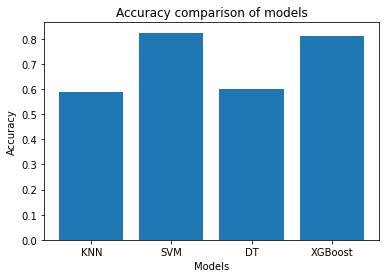

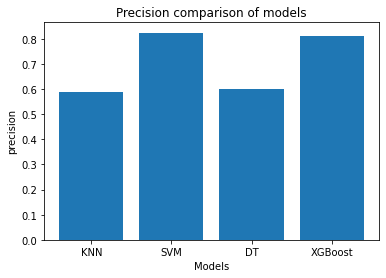

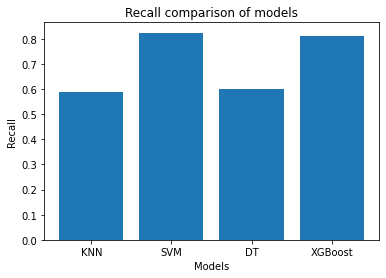

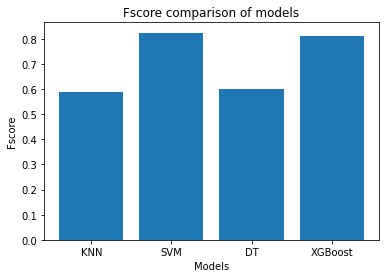

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Convert the text data into a tf-idf representation
vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(data['Text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, data['Author'], test_size=0.2)


# K-NEAREST NEIGHBOU train and evaluate 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='micro')
knn_recall = recall_score(y_test, knn_pred,average='micro')
knn_fscore = f1_score (y_test, knn_pred,average='micro')

print('knn_accuracy with Bag of Words = ',knn_accuracy)
print('knn_precision with Bag of Words = ',knn_precision)
print('knn_recall with Bag of Words = ',knn_recall)
print('knn_Fscore with Bag of Words = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='micro')
dt_recall = recall_score(y_test, dt_pred,average='micro')
dt_fscore = f1_score (y_test, dt_pred,average='micro')

print('dt_accuracy with Bag of Words  = ',dt_accuracy)
print('dt_precision with Bag of Words = ',dt_precision)
print('dt_recall with Bag of Words = ',dt_recall)
print('dt_Fscore with Bag of Words = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='micro')
svm_recall = recall_score(y_test, svm_pred,average='micro')
svm_fscore = f1_score (y_test, svm_pred,average='micro')


print('svm_accuracy with Bag of Words = ',svm_accuracy)
print('svm_precision with Bag of Words = ',svm_precision)
print('svm_recall with Bag of Words = ',svm_recall)
print('svm_Fscore with Bag of Words = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='micro')
xgb_recall = recall_score(y_test, xgb_pred,average='micro')
xgb_fscore = f1_score (y_test, xgb_pred,average='micro')


print('xgb_accuracy with Bag of Words = ',xgb_accuracy)
print('xgb_precision with Bag of Words = ',xgb_precision)
print('xgb_recall with Bag of Words = ',xgb_recall)
print('xgb_Fscore with Bag of Words = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

# CONFUSION MATRIX AND ERROR ANALYSIS FOR BAG OF WORDS 

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

#SVM ERROR ANALYSIS AND CONFUSION MATRIX 

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,And the Green Carnation withered as in forest...,G. K. Chesterton,John Milton
1,lower for a fish that moment as on the day hi...,Herman Melville,Herman Melville
2,am sure it was a consolation to you Oh no ...,Jane Austen,Maria
3,gave thee to possess and rule No despicable g...,John Milton,John Milton
4,you could present Harriet and if I thought I...,Jane Austen,Jane Austen
...,...,...,...
195,Antony for days and days along his greenturfe...,Herman Melville,John Milton
196,head at him in a manner that made him tremble ...,Maria,Maria
197,to return to you this Flora She put it into ...,Maria,Maria
198,balmy reed How nature paints her colours how...,John Milton,John Milton


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with Bag Of Words are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with Bag Of Words are: 35

The confusion matrix for the SVM model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          28      3           0     1       1
Maria            3     35           0     5       4
Chesterton       0      1          38     1       3
Jane             0      0           0    30       0
Milton           5      3           5     0      34
--------------------------------------------------------------------------------------------


#KNN ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
knn_pred = knn.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=knn_pred
df

,Text,actual_data,predicted_data
0,And the Green Carnation withered as in forest...,G. K. Chesterton,Jane Austen
1,lower for a fish that moment as on the day hi...,Herman Melville,G. K. Chesterton
2,am sure it was a consolation to you Oh no ...,Jane Austen,Jane Austen
3,gave thee to possess and rule No despicable g...,John Milton,John Milton
4,you could present Harriet and if I thought I...,Jane Austen,Jane Austen
...,...,...,...
195,Antony for days and days along his greenturfe...,Herman Melville,John Milton
196,head at him in a manner that made him tremble ...,Maria,G. K. Chesterton
197,to return to you this Flora She put it into ...,Maria,Jane Austen
198,balmy reed How nature paints her colours how...,John Milton,G. K. Chesterton


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with Bag Of Words are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")



The number of wrong predictions made by the KNN model with Bag Of Words are: 82

The confusion matrix for the KNN model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          26      3           2     2       0
Maria           25     15           0     2       5
Chesterton       4      0          36     3       0
Jane             3      0           0    27       0
Milton          15      2          14     2      14
--------------------------------------------------------------------------------------------


#Decision Tree ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
dt_pred = dt.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=dt_pred
df

,Text,actual_data,predicted_data
0,And the Green Carnation withered as in forest...,G. K. Chesterton,John Milton
1,lower for a fish that moment as on the day hi...,Herman Melville,Maria
2,am sure it was a consolation to you Oh no ...,Jane Austen,G. K. Chesterton
3,gave thee to possess and rule No despicable g...,John Milton,John Milton
4,you could present Harriet and if I thought I...,Jane Austen,Jane Austen
...,...,...,...
195,Antony for days and days along his greenturfe...,Herman Melville,John Milton
196,head at him in a manner that made him tremble ...,Maria,Maria
197,to return to you this Flora She put it into ...,Maria,Maria
198,balmy reed How nature paints her colours how...,John Milton,Maria


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with Bag Of Words are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")


The number of wrong predictions made by the decision tree model with Bag Of Words are: 80

The confusion matrix for the Decision Tree model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          22      5           1     2       3
Maria            3     31           2     5       6
Chesterton       4      6          24     2       7
Jane             1      7           1    18       3
Milton           3      4          12     3      25
--------------------------------------------------------------------------------------------


#XGBoost ERROR AND CONFUSION MATRIX 

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
xgb_pred = xgb_model.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=xgb_pred
df

,Text,actual_data,predicted_data
0,And the Green Carnation withered as in forest...,G. K. Chesterton,John Milton
1,lower for a fish that moment as on the day hi...,Herman Melville,Herman Melville
2,am sure it was a consolation to you Oh no ...,Jane Austen,Maria
3,gave thee to possess and rule No despicable g...,John Milton,John Milton
4,you could present Harriet and if I thought I...,Jane Austen,Jane Austen
...,...,...,...
195,Antony for days and days along his greenturfe...,Herman Melville,John Milton
196,head at him in a manner that made him tremble ...,Maria,Maria
197,to return to you this Flora She put it into ...,Maria,Maria
198,balmy reed How nature paints her colours how...,John Milton,John Milton


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with Bag Of Words are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the XGBoost model with Bag Of Words are: 33

The confusion matrix for the XGBoost model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          34      0           0     2       4
Maria            5     28           0     5       6
Chesterton       1      0          33     0       6
Jane             0      1           0    38       0
Milton           0      0           1     2      34
--------------------------------------------------------------------------------------------


# TF-IDF 

knn_accuracy with TF-IDF =  0.805
knn_precision with TF-IDF =  0.805
knn_recall with TF-IDF =  0.805
knn_Fscore with TF-IDF =  0.805
----------------------------------------------------------------
dt_accuracy with TF-IDF  =  0.62
dt_precision with TF-IDF =  0.62
dt_recall with TF-IDF =  0.62
dt_Fscore with TF-IDF =  0.62
----------------------------------------------------------------
svm_accuracy with TF-IDF =  0.915
svm_precision with TF-IDF =  0.915
svm_recall with TF-IDF =  0.915
svm_Fscore with TF-IDF =  0.915
----------------------------------------------------------------
xgb_accuracy with TF-IDF =  0.825
xgb_precision with TF-IDF =  0.825
xgb_recall with TF-IDF =  0.825
xgb_Fscore with TF-IDF =  0.825
----------------------------------------------------------------


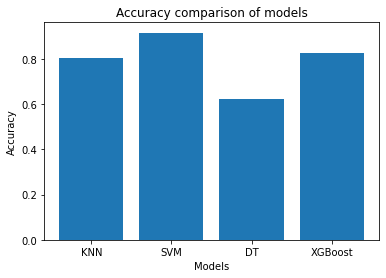

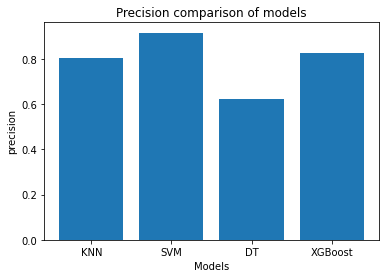

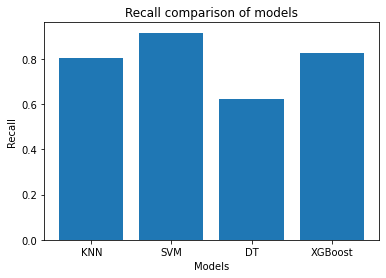

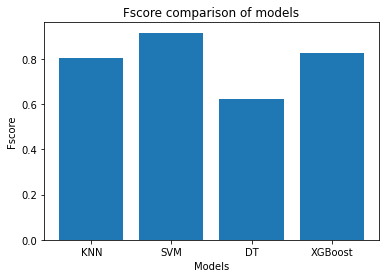

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
#df = pd.read_csv('book_partitions.csv')

# Convert the text data into a tf-idf representation
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, data['Author'], test_size=0.2, random_state=42)

# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='micro')
knn_recall = recall_score(y_test, knn_pred,average='micro')
knn_fscore = f1_score (y_test, knn_pred,average='micro')

print('knn_accuracy with TF-IDF = ',knn_accuracy)
print('knn_precision with TF-IDF = ',knn_precision)
print('knn_recall with TF-IDF = ',knn_recall)
print('knn_Fscore with TF-IDF = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='micro')
dt_recall = recall_score(y_test, dt_pred,average='micro')
dt_fscore = f1_score (y_test, dt_pred,average='micro')

print('dt_accuracy with TF-IDF  = ',dt_accuracy)
print('dt_precision with TF-IDF = ',dt_precision)
print('dt_recall with TF-IDF = ',dt_recall)
print('dt_Fscore with TF-IDF = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='micro')
svm_recall = recall_score(y_test, svm_pred,average='micro')
svm_fscore = f1_score (y_test, svm_pred,average='micro')


print('svm_accuracy with TF-IDF = ',svm_accuracy)
print('svm_precision with TF-IDF = ',svm_precision)
print('svm_recall with TF-IDF = ',svm_recall)
print('svm_Fscore with TF-IDF = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='micro')
xgb_recall = recall_score(y_test, xgb_pred,average='micro')
xgb_fscore = f1_score (y_test, xgb_pred,average='micro')


print('xgb_accuracy with TF-IDF = ',xgb_accuracy)
print('xgb_precision with TF-IDF = ',xgb_precision)
print('xgb_recall with TF-IDF = ',xgb_recall)
print('xgb_Fscore with TF-IDF = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

#CONFUSION MATRIX AND ERROR ANALYSIS FOR TF-IDF

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# SVM ERROR ANALYSIS AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,half historic memory in connection with these ...,G. K. Chesterton,G. K. Chesterton
1,not Do you think so replied he I can no...,Jane Austen,Jane Austen
2,my doing I know I have not forgotten it I a...,Jane Austen,Jane Austen
3,That was the windup of the history that was t...,Jane Austen,Jane Austen
4,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,wanted I struck a sort of paralytic attitude ...,G. K. Chesterton,G. K. Chesterton
196,by the zeal of his PARTY and he mistook their...,Maria,Maria
197,to your pretty guineahen said Barbara in an...,Maria,Maria
198,in the case and he told him so and Mr Elton ...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with TF-IDF are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with TF-IDF are: 32

The confusion matrix for the SVM model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          31      5           0     0       1
Maria            1     30           0     0       2
Chesterton       3      2          33     0       0
Jane             0      3           0    41       0
Milton           5      2           7     1      33
--------------------------------------------------------------------------------------------


# KNN ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
knn_pred = knn.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=knn_pred
df

,Text,actual_data,predicted_data
0,half historic memory in connection with these ...,G. K. Chesterton,G. K. Chesterton
1,not Do you think so replied he I can no...,Jane Austen,Jane Austen
2,my doing I know I have not forgotten it I a...,Jane Austen,Jane Austen
3,That was the windup of the history that was t...,Jane Austen,Jane Austen
4,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,wanted I struck a sort of paralytic attitude ...,G. K. Chesterton,G. K. Chesterton
196,by the zeal of his PARTY and he mistook their...,Maria,Jane Austen
197,to your pretty guineahen said Barbara in an...,Maria,G. K. Chesterton
198,in the case and he told him so and Mr Elton ...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with TF-IDF are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")


The number of wrong predictions made by the KNN model with TF-IDF are: 81

The confusion matrix for the KNN model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          29      7           0     0       1
Maria           10     19           1     0       3
Chesterton       4      1          31     0       2
Jane             9      9           3    21       2
Milton          13      6          10     0      19
--------------------------------------------------------------------------------------------


#Decision Tree ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
dt_pred = dt.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=dt_pred
df

,Text,actual_data,predicted_data
0,half historic memory in connection with these ...,G. K. Chesterton,G. K. Chesterton
1,not Do you think so replied he I can no...,Jane Austen,Jane Austen
2,my doing I know I have not forgotten it I a...,Jane Austen,Jane Austen
3,That was the windup of the history that was t...,Jane Austen,Maria
4,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,wanted I struck a sort of paralytic attitude ...,G. K. Chesterton,Maria
196,by the zeal of his PARTY and he mistook their...,Maria,G. K. Chesterton
197,to your pretty guineahen said Barbara in an...,Maria,G. K. Chesterton
198,in the case and he told him so and Mr Elton ...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with TF-IDF are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the decision tree model with TF-IDF are: 72

The confusion matrix for the Decision Tree model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          22      4           1     2       8
Maria            4     23           1     3       2
Chesterton       1      3          28     0       6
Jane             1      6           1    34       2
Milton           6     11           7     3      21
--------------------------------------------------------------------------------------------


# XGBoost ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
xgb_pred = xgb_model.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=xgb_pred
df

,Text,actual_data,predicted_data
0,half historic memory in connection with these ...,G. K. Chesterton,Herman Melville
1,not Do you think so replied he I can no...,Jane Austen,Jane Austen
2,my doing I know I have not forgotten it I a...,Jane Austen,Jane Austen
3,That was the windup of the history that was t...,Jane Austen,Jane Austen
4,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,wanted I struck a sort of paralytic attitude ...,G. K. Chesterton,G. K. Chesterton
196,by the zeal of his PARTY and he mistook their...,Maria,Maria
197,to your pretty guineahen said Barbara in an...,Maria,Maria
198,in the case and he told him so and Mr Elton ...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with TF-IDF are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the XGBoost model with TF-IDF are: 36

The confusion matrix for the XGBoost model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          24      8           0     1       4
Maria            0     30           0     2       1
Chesterton       0      1          34     0       3
Jane             0      5           0    39       0
Milton           0      4           4     3      37
--------------------------------------------------------------------------------------------


# N-GRAM


knn_accuracy with N-GRAM =  0.595
knn_precision with N-GRAM =  0.595
knn_recall with N-GRAM =  0.595
knn_Fscore with N-GRAM =  0.595
----------------------------------------------------------------
dt_accuracy with N-GRAM  =  0.635
dt_precision with N-GRAM =  0.635
dt_recall with N-GRAM =  0.635
dt_Fscore with N-GRAM =  0.635
----------------------------------------------------------------
svm_accuracy with N-GRAM =  0.84
svm_precision with N-GRAM =  0.84
svm_recall with N-GRAM =  0.84
svm_Fscore with N-GRAM =  0.8399999999999999
----------------------------------------------------------------
xgb_accuracy with N-GRAM =  0.82
xgb_precision with N-GRAM =  0.82
xgb_recall with N-GRAM =  0.82
xgb_Fscore with N-GRAM =  0.82
----------------------------------------------------------------


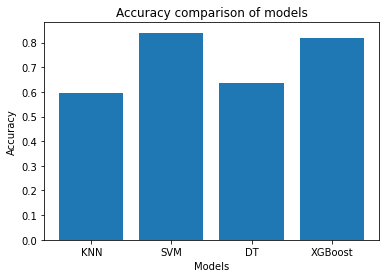

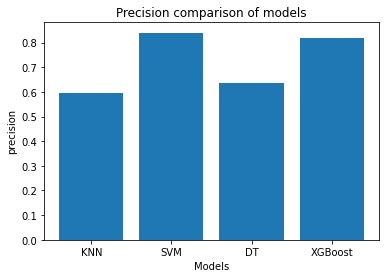

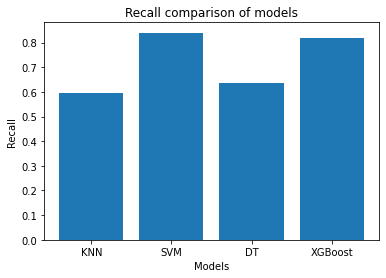

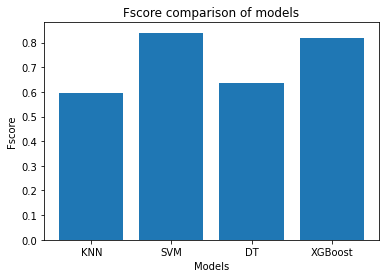

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
#df = pd.read_csv('book_partitions3.csv')

# Convert the text data into a n-gram representation
vectorizer = CountVectorizer(ngram_range=(1, 2))
ngrams = vectorizer.fit_transform(data['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ngrams, data['Author'], test_size=0.2, random_state=42)

# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='micro')
knn_recall = recall_score(y_test, knn_pred,average='micro')
knn_fscore = f1_score (y_test, knn_pred,average='micro')

print('knn_accuracy with N-GRAM = ',knn_accuracy)
print('knn_precision with N-GRAM = ',knn_precision)
print('knn_recall with N-GRAM = ',knn_recall)
print('knn_Fscore with N-GRAM = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='micro')
dt_recall = recall_score(y_test, dt_pred,average='micro')
dt_fscore = f1_score (y_test, dt_pred,average='micro')

print('dt_accuracy with N-GRAM  = ',dt_accuracy)
print('dt_precision with N-GRAM = ',dt_precision)
print('dt_recall with N-GRAM = ',dt_recall)
print('dt_Fscore with N-GRAM = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='micro')
svm_recall = recall_score(y_test, svm_pred,average='micro')
svm_fscore = f1_score (y_test, svm_pred,average='micro')


print('svm_accuracy with N-GRAM = ',svm_accuracy)
print('svm_precision with N-GRAM = ',svm_precision)
print('svm_recall with N-GRAM = ',svm_recall)
print('svm_Fscore with N-GRAM = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='micro')
xgb_recall = recall_score(y_test, xgb_pred,average='micro')
xgb_fscore = f1_score (y_test, xgb_pred,average='micro')


print('xgb_accuracy with N-GRAM = ',xgb_accuracy)
print('xgb_precision with N-GRAM = ',xgb_precision)
print('xgb_recall with N-GRAM = ',xgb_recall)
print('xgb_Fscore with N-GRAM = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()

# CONFUSION MATRIX AND ERROR ANALYSIS FOR N-GRAM

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# SVM ERROR ANALYSIS AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
svm_pred = svm.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=svm_pred
df

,Text,actual_data,predicted_data
0,half historic memory in connection with these ...,G. K. Chesterton,G. K. Chesterton
1,not Do you think so replied he I can no...,Jane Austen,Jane Austen
2,my doing I know I have not forgotten it I a...,Jane Austen,Jane Austen
3,That was the windup of the history that was t...,Jane Austen,Jane Austen
4,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,wanted I struck a sort of paralytic attitude ...,G. K. Chesterton,G. K. Chesterton
196,by the zeal of his PARTY and he mistook their...,Maria,Maria
197,to your pretty guineahen said Barbara in an...,Maria,Maria
198,in the case and he told him so and Mr Elton ...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the SVM model with N-GRAM are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), svm_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the SVM model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the SVM model with N-GRAM are: 32

The confusion matrix for the SVM model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          31      5           0     0       1
Maria            1     30           0     0       2
Chesterton       3      2          33     0       0
Jane             0      3           0    41       0
Milton           5      2           7     1      33
--------------------------------------------------------------------------------------------


# KNN ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
knn_pred = knn.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=knn_pred
df

,Text,actual_data,predicted_data
0,half historic memory in connection with these ...,G. K. Chesterton,G. K. Chesterton
1,not Do you think so replied he I can no...,Jane Austen,Jane Austen
2,my doing I know I have not forgotten it I a...,Jane Austen,Jane Austen
3,That was the windup of the history that was t...,Jane Austen,Jane Austen
4,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,wanted I struck a sort of paralytic attitude ...,G. K. Chesterton,G. K. Chesterton
196,by the zeal of his PARTY and he mistook their...,Maria,Jane Austen
197,to your pretty guineahen said Barbara in an...,Maria,G. K. Chesterton
198,in the case and he told him so and Mr Elton ...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the KNN model with N-GRAM are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), knn_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the KNN model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the KNN model with N-GRAM are: 81

The confusion matrix for the KNN model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          29      7           0     0       1
Maria           10     19           1     0       3
Chesterton       4      1          31     0       2
Jane             9      9           3    21       2
Milton          13      6          10     0      19
--------------------------------------------------------------------------------------------


# Decision Tree ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
dt_pred = dt.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=dt_pred
df

,Text,actual_data,predicted_data
0,half historic memory in connection with these ...,G. K. Chesterton,Maria
1,not Do you think so replied he I can no...,Jane Austen,Jane Austen
2,my doing I know I have not forgotten it I a...,Jane Austen,Jane Austen
3,That was the windup of the history that was t...,Jane Austen,Jane Austen
4,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,wanted I struck a sort of paralytic attitude ...,G. K. Chesterton,Maria
196,by the zeal of his PARTY and he mistook their...,Maria,G. K. Chesterton
197,to your pretty guineahen said Barbara in an...,Maria,G. K. Chesterton
198,in the case and he told him so and Mr Elton ...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the decision tree model with N-GRAM are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), dt_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the Decision Tree model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the decision tree model with N-GRAM are: 73

The confusion matrix for the Decision Tree model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          22      5           1     1       8
Maria            3     23           1     3       3
Chesterton       2      3          28     0       5
Jane             1      6           0    33       4
Milton           5     13           7     2      21
--------------------------------------------------------------------------------------------


# XGBoost ERROR AND CONFUSION MATRIX

In [ ]:
temp=[]
for i in y_test.index:
  temp.append(data['Text'].iloc[i])
df=pd.DataFrame(temp,columns=['Text'])
xgb_pred = xgb_model.predict(X_test)
df['actual_data']=y_test.to_numpy()
df['predicted_data']=xgb_pred
df

,Text,actual_data,predicted_data
0,half historic memory in connection with these ...,G. K. Chesterton,Herman Melville
1,not Do you think so replied he I can no...,Jane Austen,Jane Austen
2,my doing I know I have not forgotten it I a...,Jane Austen,Jane Austen
3,That was the windup of the history that was t...,Jane Austen,Jane Austen
4,he said in a dangerous voice that I am seri...,G. K. Chesterton,G. K. Chesterton
...,...,...,...
195,wanted I struck a sort of paralytic attitude ...,G. K. Chesterton,G. K. Chesterton
196,by the zeal of his PARTY and he mistook their...,Maria,Maria
197,to your pretty guineahen said Barbara in an...,Maria,Maria
198,in the case and he told him so and Mr Elton ...,Jane Austen,Jane Austen


In [ ]:
df['Count']=df['predicted_data'] == df['actual_data']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions made by the XGBoost model with N-GRAM are:",200-count)

conf_matrix = confusion_matrix(y_test.to_numpy(), xgb_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Herman', 'Maria','Chesterton','Jane','Milton'], columns=['Herman', 'Maria','Chesterton','Jane','Milton'])
print('\nThe confusion matrix for the XGBoost model is \n\n',conf_matrix_df)
print("--------------------------------------------------------------------------------------------")

The number of wrong predictions made by the XGBoost model with N-GRAM are: 36

The confusion matrix for the XGBoost model is 

             Herman  Maria  Chesterton  Jane  Milton
Herman          24      8           0     1       4
Maria            0     30           0     2       1
Chesterton       0      1          34     0       3
Jane             0      5           0    39       0
Milton           0      4           4     3      37
--------------------------------------------------------------------------------------------


# CHAMPION MODEL = SVM WITH TF-IDF AVERAGING AN ACCURACY OF 0.94

# 10 FOLD COSS VALIDATION FOR CHAMPION MODEL 


In [ ]:
import numpy as np
from sklearn.model_selection import KFold

def ten_fold_cross_validation(model, X, y):
    kf = KFold(n_splits=10)
    accuracy = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
    
    return np.array(accuracy)


In [ ]:
print("10 fold validation for SVM ")
ten_fold_cross_validation(svm,tfidf,data['Author'])

10 fold validation for SVM 


array([0.41, 0.46, 0.31, 0.32, 0.31, 0.43, 0.62, 0.66, 0.76, 0.79])

# LOWERING THE ACCURACY 

knn_accuracy with TF-IDF =  0.5589473684210526
knn_precision with TF-IDF =  0.5589473684210526
knn_recall with TF-IDF =  0.5589473684210526
knn_Fscore with TF-IDF =  0.5589473684210526
----------------------------------------------------------------
dt_accuracy with TF-IDF  =  0.43157894736842106
dt_precision with TF-IDF =  0.43157894736842106
dt_recall with TF-IDF =  0.43157894736842106
dt_Fscore with TF-IDF =  0.4315789473684211
----------------------------------------------------------------
svm_accuracy with TF-IDF =  0.21157894736842106
svm_precision with TF-IDF =  0.21157894736842106
svm_recall with TF-IDF =  0.21157894736842106
svm_Fscore with TF-IDF =  0.21157894736842103
----------------------------------------------------------------
xgb_accuracy with TF-IDF =  0.4568421052631579
xgb_precision with TF-IDF =  0.4568421052631579
xgb_recall with TF-IDF =  0.4568421052631579
xgb_Fscore with TF-IDF =  0.4568421052631579
-------------------------------------------------------------

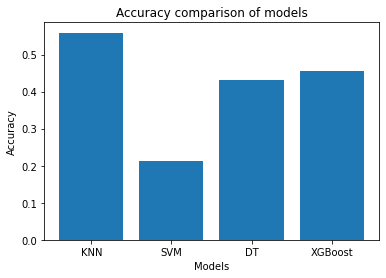

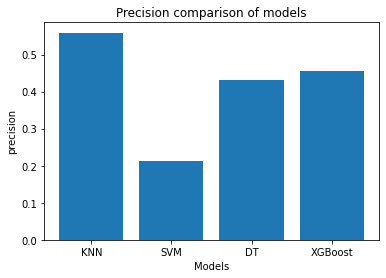

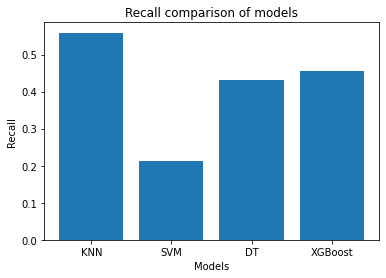

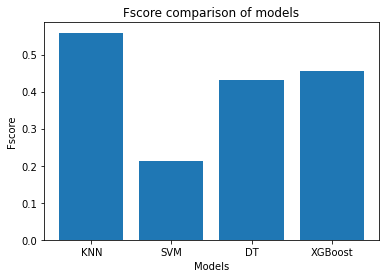

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Read the csv file
#df = pd.read_csv('book_partitions.csv')

# Convert the text data into a tf-idf representation
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['Text'].values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, data['Author'], test_size=0.95, random_state=42)

# K-NEAREST NEIGHBOUR 
# Train and evaluate the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='micro')
knn_recall = recall_score(y_test, knn_pred,average='micro')
knn_fscore = f1_score (y_test, knn_pred,average='micro')

print('knn_accuracy with TF-IDF = ',knn_accuracy)
print('knn_precision with TF-IDF = ',knn_precision)
print('knn_recall with TF-IDF = ',knn_recall)
print('knn_Fscore with TF-IDF = ',knn_fscore)
print("----------------------------------------------------------------")


#DECISION TREE 
# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)



dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='micro')
dt_recall = recall_score(y_test, dt_pred,average='micro')
dt_fscore = f1_score (y_test, dt_pred,average='micro')

print('dt_accuracy with TF-IDF  = ',dt_accuracy)
print('dt_precision with TF-IDF = ',dt_precision)
print('dt_recall with TF-IDF = ',dt_recall)
print('dt_Fscore with TF-IDF = ',dt_fscore)
print("----------------------------------------------------------------")



# Train and evaluate the SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred,average='micro')
svm_recall = recall_score(y_test, svm_pred,average='micro')
svm_fscore = f1_score (y_test, svm_pred,average='micro')


print('svm_accuracy with TF-IDF = ',svm_accuracy)
print('svm_precision with TF-IDF = ',svm_precision)
print('svm_recall with TF-IDF = ',svm_recall)
print('svm_Fscore with TF-IDF = ',svm_fscore)
print("----------------------------------------------------------------")

# Train and evaluate the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='micro')
xgb_recall = recall_score(y_test, xgb_pred,average='micro')
xgb_fscore = f1_score (y_test, xgb_pred,average='micro')


print('xgb_accuracy with TF-IDF = ',xgb_accuracy)
print('xgb_precision with TF-IDF = ',xgb_precision)
print('xgb_recall with TF-IDF = ',xgb_recall)
print('xgb_Fscore with TF-IDF = ',xgb_fscore)
print("----------------------------------------------------------------")
#++++++++++++++++++++++++++++++++++++++++++++++++


# Plot the accuracy comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
accuracies = [knn_accuracy, svm_accuracy,dt_accuracy, xgb_accuracy]
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison of models')
plt.show()

# Plot the Precision comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
precisions = [knn_precision, svm_precision,dt_precision, xgb_precision]
plt.bar(models, precisions)
plt.xlabel('Models')
plt.ylabel('precision')
plt.title('Precision comparison of models')
plt.show()

# Plot the Recall comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
recalls = [knn_recall, svm_recall,dt_recall, xgb_recall]
plt.bar(models, recalls)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall comparison of models')
plt.show()

# Plot the Fscore comparison of the models
models = ['KNN', 'SVM','DT', 'XGBoost']
fscores = [knn_fscore, svm_fscore,dt_fscore, xgb_fscore]
plt.bar(models, fscores)
plt.xlabel('Models')
plt.ylabel('Fscore')
plt.title('Fscore comparison of models')
plt.show()